# chap[실전] 
- 타이타닉 생존율 예측 모형을 위한 데이터 파악

### 타이타닉 데이터 가져오기
- 분석에 사용하지 않을 body, home.dest열 삭제

In [5]:
import pandas as pd
titanic_url = 'https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic=pd.read_excel(titanic_url, sheet_name = 'total')
titanic_df = titanic.drop(['body', 'home.dest'], axis = 1)
#열(column) 기준으로 삭제(axis = 0이면 행(row)기준
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


### 연령별 생존율 파악하기
- 연령별 생존율 파악
  + cut 함수로 열의 특정 기준 나누기
  + bins 옵션으로 나누는 기간 정하기
  + labels 옵션으로 구간별 라벨 설정
  + 나눈 값을 'age_cat'이라는 새로운 열에 대입

In [12]:
titanic_df['age_cat'] = pd.cut(titanic_df['age'], 
                               bins = [0,3,7,15,30,60,100], 
                               include_lowest = True,
                               labels = ['baby', 'children', 'teenage', 'young', 'adult', 'old'])
titanic_df.groupby('age_cat', observed= True).mean(numeric_only = True)
#age_cat에 숫자가 아닌 문자열로 이루어진 칼럼들은 제거해야 mean(평균)을 구할 수 있기 때문에 numeric_only = True)

,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309


### 등급(pclass), 연령(age_cat), 성별(sex)에 따른 생존율 시각화
- subplot
  + 하나의 figure(전체 그래프 영역) 안에 여러개의 서브플롯(작은 그래프)을 배치할 때 사용
  + 행(row), 열(column), 플롯 번호(index)를 인자로 받아 특정 위치에 그래프를 배치
  + 

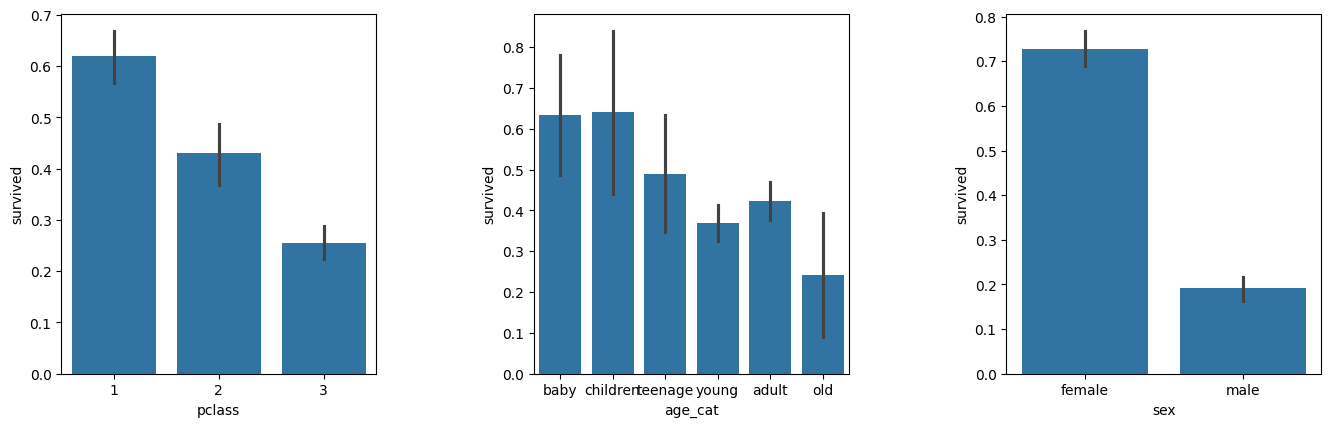

In [17]:
import seaborn as sns
%matplotlib inline
#jupyter Notebook에서 그래프를 바로 출력할 수 있도록 설정
from matplotlib import pyplot as plt
data = titanic_df
plt.figure(figsize=[14,4])
#새로운 그림(figure)생성: plt.figure()
#가로 14인치, 세로 4인치 크기의 그림 설정
plt.subplot(131)
#첫 번째 서브플롯
#전체 그림을 1행 3열로 나누고, 첫 번째 위치에 그래프를 배치
sns.barplot(x= 'pclass', y = 'survived', data = titanic_df)
#sns.barplot(...): 객실 등급에 따른 생존율을 막대 그래프로 나타냄
plt.subplot(132)
#두 번째 서브플롯
#전체 그림을 1행 3열로 나누고, 두 번째 위치에 그래프를 배치
sns.barplot(x = 'age_cat', y = 'survived', data= titanic_df)
#sns.barplot(...): 연령대(age_cat)에 따른 생존율을 나타냄
plt.subplot(133)
#세 번째 서브플롯
#전체 그림을 1행 3열로 나누고, 세 번째 위치에 그래프를 배치
sns.barplot(x = 'sex', y = 'survived', data = titanic_df)
#sns.barplot(...): 성별(sex)에 따른 생존율을 나타냄.
plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.10, right = 1, hspace =0.5, wspace = 0.5)
# top, bottom, left, right: 그래프 위치 조정 / hspace: 세로 간격 조정 / wspace: 가로 간격 조정
plt.show()

### 승객 등급별 데이터 보기

In [21]:
titanic_df.groupby(['pclass','sex']).mean(numeric_only = True)

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

### 보트 탑승 승객의 생존율 파악하기
- 보트 탑승 승객만 추려서 boat_survivor
- 보트 탑승 못한 승객만 추려서 nboat_survivor

In [26]:
boat_survivors = titanic_df[titanic_df['boat'].notnull()]
#boat칼럼이 비어있지 않은 행만 선택
nboat_survivors = titanic_df[titanic_df['boat'].isnull()]
#boat칼럼이 비어있는 행만 선택
print(boat_survivors.groupby('sex')['survived'].mean())
print(nboat_survivors.groupby('sex')['survived'].mean())

sex
female    0.996865
male      0.952096
Name: survived, dtype: float64
sex
female    0.142857
male      0.002959
Name: survived, dtype: float64


### 생존율 시각화

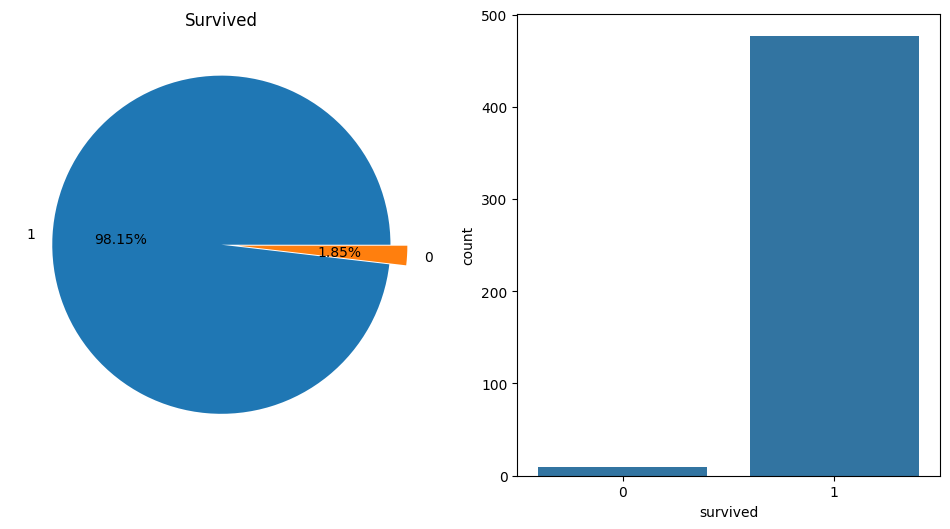

In [28]:
f, ax= plt.subplots(1, 2, figsize=(12,6))
# 1개의 행과 2개의 열을 가지는 서브플롯을 생성(즉 그래프 2개를 한 줄에 배치)
# 가로 12인치, 세로 6인치로 설정
# ax는 2개의 서브 플롯을 담고있는 리스트처럼 사용됨(ax[0], ax[1])
boat_survivors['survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.2f%%',ax = ax[0])
#생존 값의 개수를 파이차트로 표시
#value_counts -> survived 의 값이 0과 1인 개수를 계산
#.plot.pie(...) 
# explode = [0,0.1]: 두 개의 조각 중 두 번 째 조각(생존자)을 약간 분리
#autopct = '%1.2f%%': 퍼센트를 소수점 두자리까지 표시
#ax= ax[0]: 첫 번째 서브플롯(ax[0])에 그래프를 그림
ax[0].set_title('Survived')
#첫 번째 서브플롯(파이차트) 제목을 'survived'로 설정
ax[0].set_ylabel('')
# y축 레이블을 제거하여 깔끔하게 표시
sns.countplot(x='survived', data=boat_survivors, ax = ax[1])
#seaborn 라이브러리를 사용하여 막대 그래프(count plot)를 생성
# x = 'survived': survived 값을 x 축에 표시 0 또는 1
#data = boat_survivors: boat_survivors 
plt.show()

### 귀족 계급의 생존율 파악하기
- name열의 호칭을 이요해 귀족 계급과 그렇지 않은 계급 간의 생존율 비교
- conversion_special 을 통해 name의 호칭을 전부 불러옴
  + Mlle, Ms -> Mrs 등으로 변경

In [35]:
conversion_special = lambda x : x.split(',')[1].split('.')[0].strip()
titanic_df['title'] = titanic_df ['name'].map(conversion_special)
#map(conversion_special)을 사용하여 name 열의 각 값에서 호칭을 추출하여 새로운 title 열을 생성
titanic_df['title'] = titanic_df['title'].replace('Mlle', 'Miss')
#특정 호칭 변경 (Mlle -> Miss)
titanic_df['title'] = titanic_df['title'].replace('Ms', 'Miss')
titanic_df['title'] = titanic_df['title'].replace('Mme', 'Mrs')
Special = ['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 'Col', 'Don', 'Dr', 'Major',
'Rev', 'Sir', 'Jonkheer', 'Dona']
for each in Special:
    titanic_df['title'] = titanic_df['title'].replace(each, 'Special')
    #특수 호칭을 Special로 통합하여 데이터를 단순화 -> 분석 쉬워짐
print(titanic_df[['title', 'survived']].groupby(['title'], as_index=False).mean())
# 각 title 별 생존율을 계산
# title 별 groupby
# as_index = False: 그룹화된 결과를 데이터프레임 형태로 유지(index로 만들지 않음)

     title  survived
0     Miss  0.678030
1       Mr  0.162483
2      Mrs  0.787879
3  Special  0.466667


### special이면서 남성인 경우와 여성인 경우의 비교

In [36]:
titanic_df.groupby(['sex', 'title']).mean(numeric_only = True)

pclass  survived        age     sibsp     parch       fare
sex    title                                                                
female Miss     2.337121  0.678030  21.824335  0.655303  0.496212  42.566747
       Mrs      1.934343  0.787879  36.918129  0.656566  0.828283  50.655366
       Special  1.000000  1.000000  42.250000  0.250000  0.000000  65.232300
male   Mr       2.381770  0.162483  32.252151  0.282695  0.159841  24.796185
       Special  2.290698  0.441860  18.007575  1.569767  1.023256  38.096026